In [1]:
%load_ext autoreload
%autoreload 2
from SyntheticControlMethods import Synth
import synth_utils as su
import pandas as pd
import numpy as np
import synth_job as sj
import cf_value as cfv

In [ ]:
df,first_day = su.build_synth_df(save=True)
df

In [ ]:
# df = cfv.build_ko_rankings()
# no_ders,w_ders = cfv.split_ders(df)
# tops = cfv.filter_one_top(w_ders)
tops = pd.read_pickle("high_vol_der.pkl")
tops_2 = pd.read_pickle("high_vol_ko.pkl")
combined_df = pd.concat([tops,tops_2])
unique_Alt = combined_df['Alt'].unique()
sj.make_and_save_alt_day_dict(unique_Alt)
combined_df

In [ ]:
tops_ders = cfv.filter_one_top(w_ders).head(10)
tops_no_ders = cfv.filter_one_top(no_ders).query("Top_ratio>0.1").head(10)
with open("high_vol_der.pkl","wb") as f:
    tops_ders.to_pickle(f)
with open("high_vol_ko.pkl","wb") as f: 
    tops_no_ders.to_pickle(f)


In [2]:
sj.get_all_placebo_results('der',offset=False)

,slug,alt,num_samples,base_error,p_value,result_id,experiment
0,boredapeyachtclub,mutant-ape-yacht-club,42,3.353856,0.023810,0,der
0,boredapeyachtclub,otherdeed,625,1.096455,0.216000,1,der
0,mutant-ape-yacht-club,otherdeed,625,1.148000,0.156800,2,der
0,mutant-ape-yacht-club,hv-mtl,689,0.946790,0.063861,3,der
0,azuki,beanzofficial,542,7.723603,0.005535,4,der
0,azuki,azukielementals,426,1.276305,0.049296,5,der
0,proof-moonbirds,moonbirds-oddities,644,1.121441,0.021739,8,der
0,proof-moonbirds,mythics-egg,629,0.953589,0.046105,9,der
0,doodles-official,the-dooplicator,640,0.840004,0.064062,10,der
0,doodles-official,genesis-box,676,0.903113,0.124260,11,der


In [ ]:
import pickle
slug = 'beanzofficial'
alt = 'sugartownoras'
with open('synth_df_cache.pkl','rb') as f:
        df,first_day = pickle.load(f)
with open('alt_day_dict.pkl','rb') as f:
    alt_day_dict = pickle.load(f)
alt_day = alt_day_dict[alt]
synth = sj.create_synth(slug,alt,norm=False,cached=True,alt_day=alt_day,offset=30)

In [41]:
res_num=0
outpath = f'val_comp/result_df{res_num}.pkl'
pd.read_pickle(outpath)

,slug,mean_samples,mean_data,interval_length,bandwidth
0,0n1-force,"[0.020489285714285727, 0.03780853813614967, -0...",-0.024636,1,None
1,0n1-force,"[-0.11056311826428568, -0.08441582819978934, 0...",-0.011447,5,None
2,0n1-force,"[0.01372142857142852, -0.049807142857142876, -...",-0.013682,10,None
3,0n1-force,"[0.030062584510714304, 0.05061389285714286, 0....",0.003284,15,None


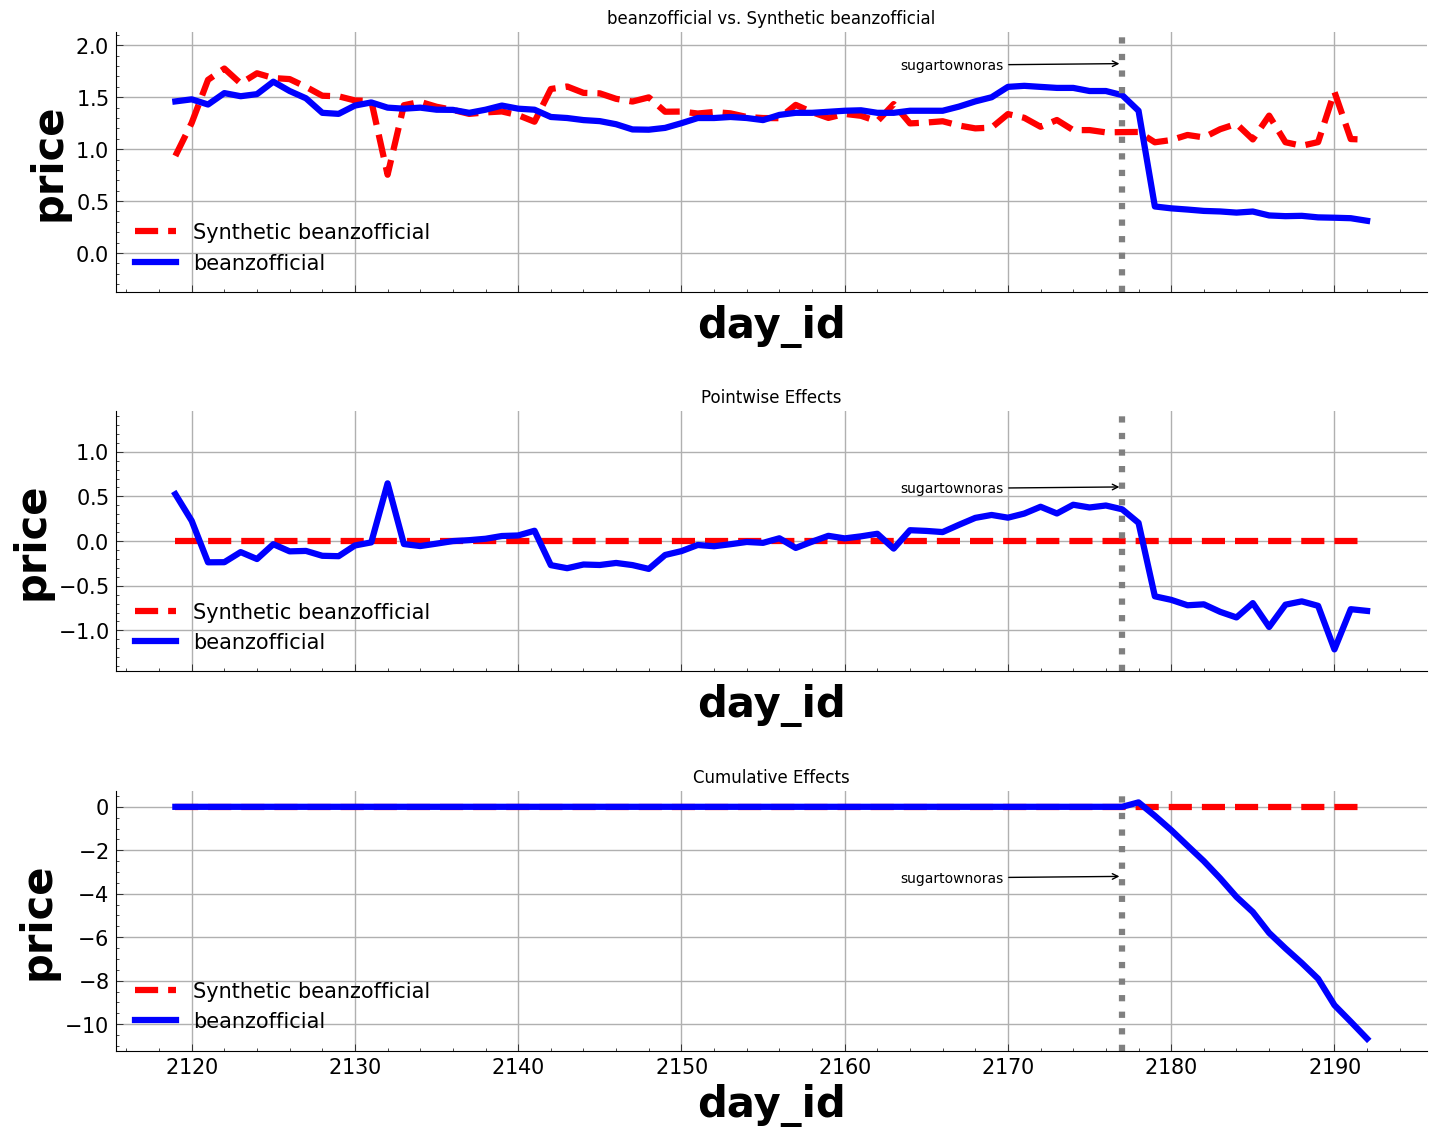

In [37]:
synth[0].plot(["original", "pointwise", "cumulative"], treated_label=slug, 
            synth_label=f"Synthetic {slug}", treatment_label=alt)

In [36]:
synth = sj.create_synth(slug,alt,norm=False,cached=True,alt_day=alt_day,offset=30)

/global/scratch/tlundy/NFT_Research/nft_research/Dino/synth_utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if offset>0:


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45514D+05    |proj g|=  6.66667D-01
  ys=-3.684E+08  -gs= 1.906E+04 BFGS update SKIPPED


/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/SyntheticControlMethods/optimize.py:182: RuntimeWarning: invalid value encountered in divide
  data.v = np.diagonal(V) / np.sum(np.diagonal(V)) #Make sure its normailzed (sometimes the optimizers diverge from bounds)



At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37220D+05    |proj g|=  9.88480D-01
  ys=-7.800E+08  -gs= 5.890E+04 BFGS update SKIPPED

At iterate    3    f=  2.21789D+01    |proj g|=  1.00000D+00

At iterate    6    f=  2.88915D+00    |proj g|=  7.31279D-07
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    9    f=  2.85840D+00    |proj g|=  1.00000D+00

At iterate   12    f=  2.85469D+00    |proj g|=  9.99999D-01
  ys=-7.089E-14  -gs= 5.919E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  2.85469D+00    |proj g|=  7.57662D-07



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16    108     25     2     3   7.577D-07   2.855D+00
  F =   2.8546873448024059     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24870D+04    |proj g|=  9.98960D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    3    f=  8.24839D+04    |proj g|=  9.98959D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     22      6     0     0   7.468D-01   8.248D+04
  F =   82483.943264772475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49522D+05    |proj g|=  8.41348D-01
  ys=-2.023E+08  -gs= 4.786E+04 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     63      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159821533     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14257D+04    |proj g|=  6.48340D-01
  ys=-1.640E+05  -gs= 1.594E+04 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     48     11     1     3   1.000D+00   2.038D+01
  F =   20.381988507152361     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37928D+05    |proj g|=  6.86484D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    3    f=  1.54058D+03    |proj g|=  6.64327D-01
  ys=-2.750E+07  -gs= 5.932E+03 BFGS update SKIPPED
  ys=-1.010E-04  -gs= 1.360E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    6    f=  2.03820D+01    |proj g|=  1.00000D+00

At iterate    9    f=  4.05884D+00    |proj g|=  1.22837D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     82     15     2     2   1.228D-08   4.059D+00
  F =   4.0588358115643386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43759D+05    |proj g|=  8.04971D-01
  ys=-7.923E+08  -gs= 2.865E+04 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39113D+05    |proj g|=  9.79849D-01

At iterate    3    f=  1.39040D+05    |proj g|=  1.87392D-01
  ys=-1.847E+01  -gs= 1.881E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     68     10     1     3   8.126D-01   1.390D+05
  F =   139031.93854715163     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59433D+05    |proj g|=  9.30245D-01
  ys=-5.853E+08  -gs= 9.304E+04 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39490D+05    |proj g|=  3.31549D-01
  ys=-1.760E+08  -gs= 3.741E+03 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [35]:
pd.set_option('display.max_rows', 100)
synth[0].head(70)


,slug,day_id,price,occurrences,price_normalized
1933,0n1-force,2119,0.700000,39.0,0.921751
1934,0n1-force,2120,0.748750,52.0,0.985945
1935,0n1-force,2121,0.819222,12.0,1.078741
1936,0n1-force,2122,0.729000,10.0,0.959938
1937,0n1-force,2123,0.700000,19.0,0.921751
1938,0n1-force,2124,0.769500,10.0,1.013268
1939,0n1-force,2125,0.680000,15.0,0.895416
1940,0n1-force,2126,0.680000,20.0,0.895416
1941,0n1-force,2127,0.680000,29.0,0.895416
1942,0n1-force,2128,0.730000,17.0,0.961255


In [33]:
synth[0]

,day_id,slug,price,occurrences,price_normalized
0,2119,0n1-force,0.700000,39.0,0.921751
1,2120,0n1-force,0.748750,52.0,0.985945
2,2121,0n1-force,0.819222,12.0,1.078741
3,2122,0n1-force,0.729000,10.0,0.959938
4,2123,0n1-force,0.700000,19.0,0.921751
...,...,...,...,...,...
157451,2218,zunkz,0.022990,9.0,0.407311
157452,2219,zunkz,0.010995,2.0,0.194797
157453,2220,zunkz,0.020000,10.0,0.354337
157454,2221,zunkz,0.028950,2.0,0.512903


In [3]:
import cf_value as cfv

df = cfv.show_cf_val_results()

15
16
17
18
19
26
27
28
29
30
31
32
33
34
45
47
49
66
67
68
69
70
71
72
73
74
76
77
78
79
91
92
93
94
95
96
97
98
99
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
134
140
141
142
143
144
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


In [10]:
df['p_value'] = df['percentile'].apply(lambda x: x*len(df)/100)

In [23]:
df

,slug,mean_samples,mean_data,interval_length,bandwidth,percentile,p_value
0,0n1-force,"[0.020910357142857054, -0.028736035714285735, ...",-0.024636,1,50,29.46,98.9856
1,0n1-force,"[-0.032049214285714285, -0.036160353571428584,...",-0.011447,5,50,41.96,140.9856
2,0n1-force,"[0.025416155939285732, -0.06232864285714286, -...",-0.013682,10,50,37.58,126.2688
3,0n1-force,"[-0.01161668969285717, -0.04400024607142857, -...",0.003284,15,50,47.80,160.6080
0,0n1-force,"[-0.0015636372209931987, -0.004643876060714266...",-0.024636,1,25,30.62,102.8832
...,...,...,...,...,...,...,...
3,mfers,"[0.545, 0.5113, -0.58068, -0.5621249999999999,...",-0.478131,15,10,14.36,48.2496
0,mfers,"[0.058999999999999775, 0.6099199999999998, 0.3...",0.169200,1,5,58.22,195.6192
1,mfers,"[0.2622299999999999, 0.6618999999999999, -0.38...",-0.034000,5,5,31.94,107.3184
2,mfers,"[-0.053, 1.0152, 0.7928200000000001, -0.564712...",-0.238000,10,5,29.04,97.5744


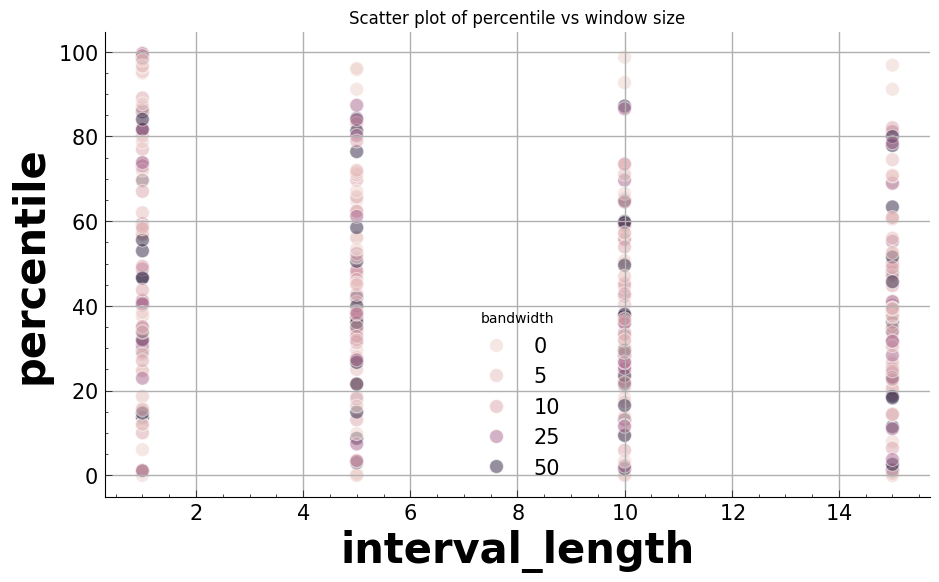

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and the columns are named 'percentile', 'window_size', and 'bandwidth'
df = df.fillna(0)
df = df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='interval_length', y='percentile', hue='bandwidth',alpha=0.5)
plt.title('Scatter plot of percentile vs window size')
plt.show()

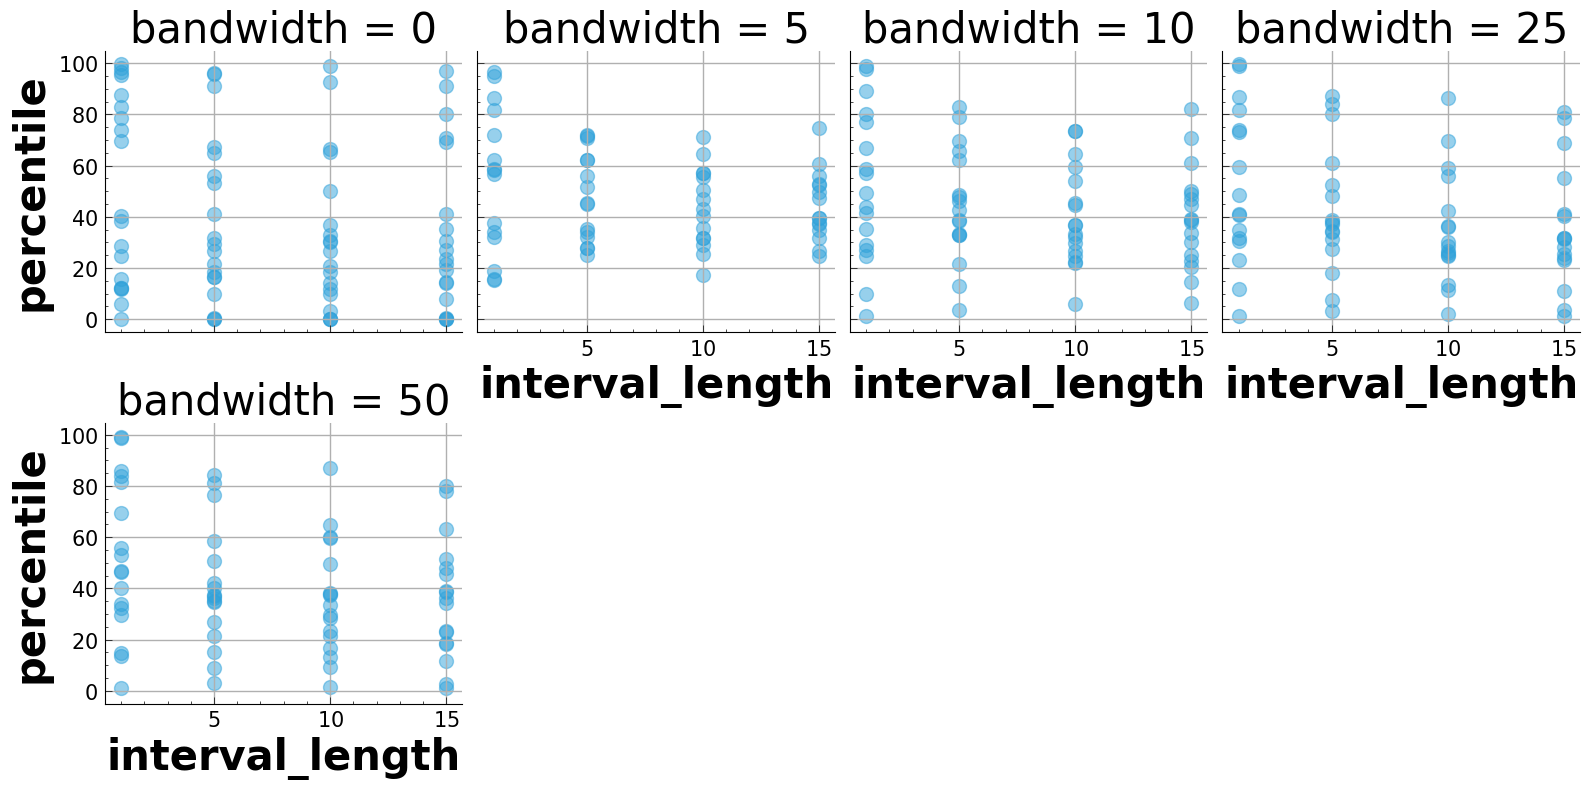

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col="bandwidth", col_wrap=4, height=4)
g = g.map(plt.scatter, "interval_length", "percentile",alpha=0.5)

plt.show()